## Web scraping

The idea is: We can't get all the ifnromations we need from the research page because the descriptions are not complete. So we first scrape the research page for all the links linking(sorry) to the every document and for every document we retrieve the informations needed. **If a document has not all the info we drop that document(that's why we have try-except)**. I know the code may be inefficient so feel free to make some changes to it. 

Ask if you questions.

In [1]:
#We import libraries needed
import time
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json
import numpy as np

In [2]:
print ("Start : %s" % time.ctime())  #Just to see the time
url="https://www.immobiliare.it/vendita-case/roma/?pag="
counturl=1
ndocs=int(100/25)
titles=[]
descriptions=[]
prices=[]
locali=[]
sup=[]
bath=[]
piano=[]
while counturl<=4:
    housesites=[]
    goodurl=url+str(counturl)
    page = requests.get(goodurl)
    soup = BeautifulSoup(page.content, 'html.parser')
    for a in soup.find_all('a', href=True,title=True,id=True):  #With this I get all the links of the page corresponding to houses
        housesites.append(a['href'])
    for a in housesites:
        time.sleep( 0.005 )
        try:
            page = requests.get(a)
            soup = BeautifulSoup(page.content, 'html.parser')
            check=soup.find_all('span',attrs = {'class':'text-bold'})[0].get_text() 
            if "€" in check:
                a=soup.find_all('h1',attrs = {'class':'raleway title-detail'})[0].get_text()
                if "asta" in a:
                    next
                else:
                    b=soup.find_all('div',attrs = {'class':'col-xs-12 description-text text-compressed'})[0].get_text()
                    c=soup.find_all('li' ,attrs={'class':'features__price'})[0].get_text()
                    d=soup.find_all('span',attrs = {'class':'text-bold'})[1].get_text() 
                    e=soup.find_all('span',attrs = {'class':'text-bold'})[2].get_text()
                    f=soup.find_all('span',attrs = {'class':'text-bold'})[3].get_text()
                    g=soup.find_all('abbr',attrs = {'class':'text-bold im-abbr'})[0].get_text()
                    c=c.replace("€","")
                    g=g.replace("\n","")
                    b=b.replace("\n","")
                    g=g.replace("T","0")
                    titles.append(a)
                    descriptions.append(b)
                    prices.append(c)
                    locali.append(d)
                    sup.append(e)
                    bath.append(f)
                    piano.append(g)

            else:
                a=soup.find_all('h1',attrs = {'class':'raleway title-detail'})[0].get_text()
                b=soup.find_all('div',attrs = {'class':'col-xs-12 description-text text-compressed'})[0].get_text()
                c=soup.find_all('li' ,attrs={'class':'features__price'})[0].get_text()
                d=soup.find_all('span',attrs = {'class':'text-bold'})[0].get_text() 
                e=soup.find_all('span',attrs = {'class':'text-bold'})[1].get_text()
                f=soup.find_all('span',attrs = {'class':'text-bold'})[2].get_text()
                g=soup.find_all('abbr',attrs = {'class':'text-bold im-abbr'})[0].get_text()
                b=b.replace("\n","")
                c=c.replace("€","")
                g=g.replace("\n","")
                g=g.replace("T","0")
                titles.append(a)
                descriptions.append(b)
                prices.append(c)
                locali.append(d)
                sup.append(e)
                bath.append(f)
                piano.append(g)

        except:
            next
    counturl+=1
        
print ("End : %s" % time.ctime())

Start : Mon Dec  3 18:35:41 2018
End : Mon Dec  3 18:39:20 2018


In [3]:
data_tuples = list(zip(titles,descriptions,prices,locali,sup,bath,piano))
df=pd.DataFrame(data_tuples,columns = ["Title","Description","Prices","Locals","Area","Bath","Floor"])

pd.set_option('display.max_colwidth', -1)

In [4]:
# We remove \xa0 from these columns:
df['Locals'] = df['Locals'].astype(str).str.replace(u'\xa0', '')
df['Bath'] = df['Bath'].astype(str).str.replace(u'\xa0', '')
df['Floor'] = df['Floor'].astype(str).str.replace(u'\xa0', '')

In [5]:
# We remove spaces in these columns:
df['Prices'] = df['Prices'].astype(str).str.strip()
df['Floor'] = df['Floor'].astype(str).str.strip()

In [6]:
# We remove dots in Prices column so, later, we can transform string array to number array:
df['Prices'] = df['Prices'].str.replace('.', '')

In [7]:
# We drop rows with non numeric symbols (es. A in Floor column or 3+ in Locals and Bath columns):
df = df[df.Locals.apply(lambda x: x.isnumeric()) & df.Bath.apply(lambda x: x.isnumeric()) & df.Floor.apply(lambda x: x.isnumeric())]

In [8]:
df

,Title,Description,Prices,Locals,Area,Bath,Floor
0,"Trilocale viale Cortina D'Ampezzo, Roma","Rif: Cortina d'Ampezzo 419 - Nella rinomata cornice di Via Cortina d’Ampezzo adiacente Via Courmayeur, in comprensorio signorile con servizio di portineria e accesso carrabile vendiamo un appartamento posto al 2°piano alto di uno stabile di 5 piani complessivi in tinta con ascensore. L'immobile è composto da soggiorno living, cucina abitabile all’americana, 2 camere matrimoniali, doppi servizi, disimpegno, balcone, 2 posti auto coperti e cantina. Porta d’ingresso blindata, pavimenti in parquet e gres, porte in legno ed infissi in PVC-DVC. Luminosissimo, doppia esposizione angolare. Riscaldamento termoautonomo. Finemente ristrutturato con materiali di pregio. Classe energetica G IPE 175",419000,3,100,2,2
2,"Trilocale via Columella, Roma","Rif: Quadraro ad. - Via dei Quintili ad.via Columella appartamento posto al piano terra di uno stabile in tinta composto da : ingresso con porta blindata, soggiornino con angolo cottura, 2 camere, soppalco e servizio con vasca. L’immobile si presenta in buone condizioni interne ed è molto silenzioso. Porta blindata, infissi in PVC-DVC, cancelletti antiintrusione alle finestre e persiane, pavimentazione in monocottura. Esposizione Nord/Ovest. APE G - IPE 175 Assicurazione casa Assicurazioni uffici Assicurazioni negozi Assicurazioni fabbriche e capannoni Assicurazioni terreni Assicurazioni su ogni tipo di attività nell’ambito del turismo/ristorazione Assicurazioni fideussorie Assicurazione per i Cani Finanziamenti “corporate",125000,3,50,1,0
3,"Trilocale via Marco Valerio Corvo, Roma","Rif: Lucio Sestio ad. 199 - Lucio Sestio ad.– Via Marco Valerio Corvo, appartamento posto al 3°piano di uno stabile di 5 piani complessivi in tinta con ascensore, composto da ingresso, soggiorno, cucina abitabile, 2 camere matrimoniali, servizio, ripostiglio, balcone e cantina. Porta blindata, pavimenti sono in gres, porte in legno ed infissi in PVC-DVC. Luminosissimo, esposizione Sud/Ovest. Riscaldamento centralizzato. Da ristrutturare. Sono stati deliberati i lavori di ristrutturazione dello stabile e saranno a carico della proprietà fino alla stipula dell'atto notarile. Classe energetica G IPE 175 Assicurazione casa Assicurazioni uffici Assicurazioni negozi Assicurazioni fabbriche e capannoni Assicurazioni terreni Assicurazioni su ogni tipo di attività nell’ambito del turismo/ristorazione Assicurazioni fideussorie Assicurazione per i Cani Finanziamenti “corporate",199000,3,85,1,3
4,"Trilocale via Francesco Laparelli, Roma","Rif: Laparelli 218 - Via Filarete ad., in palazzo in fase di ristrutturazione con servizio di portineria, appartamento posto al 1° piano con ascensore composto da ingresso con disimpegno, salone con accesso al balcone, cucina abitabile, 2 camere di cui una con accesso al balcone e l’altra al terrazzo di 40 mq, servizio con vasca e ripostiglio. Infissi in PVC-DVC, porte in legno, porta d’ingresso blindata, pavimenti in marmo. Doppia esposizione Est/Ovest. Buono stato interno, riscaldamento centralizzato. Cl. Energ. G Ipe 175Assicurazione casa Assicurazioni uffici Assicurazioni negozi Assicurazioni fabbriche e capannoni Assicurazioni terreni Assicurazioni su ogni tipo di attività nell’ambito del turismo/ristorazione Assicurazioni fideussorie Assicurazione per i Cani Finanziamenti “corporate",218000,3,100,1,1
6,"Loft / Open Space via Bivongi, Roma","Rif: Loft Via Bivongi - Via Gasperina ad. Via Bivongi , in strada elegante e palazzo in cortina, appartamento accatastato C/2 di 120 mq posto al piano seminterrato composto da salone a vista di oltre 50 mq con angolo cottura in muratura, camera da letto con ampia cabina armadio e servizio con vasca idromassaggio jacuzzi. Ottimo stato di manutenzione, porta blindata, pavimentazione in parquet, infissi in PVC, finestre a bocca di lupo, riscaldamento autonomo. Ape G IPE 175 Assicurazione casa Assicurazioni uffici Assicurazioni negozi Assicurazioni fabbriche e 

In [9]:
des = list(df.Description)

In [10]:
with open('description.txt', 'w') as f: 
    json.dump(des, f)

In [11]:
len(df)

66

## For liwam

**You have the descriptions in the list called descriptions**

In [13]:
with open('description.txt')as f: 
    c_d = json.load(f)
    
with open('cleaned_description.txt', 'w') as f: 
    json.dump(clean(c_d), f)

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
import math

def clean(data): 
    cleaned_data = []
    for i in data: 
        #dadta with stop words removed
        s = []       
        #data with punctuation removed
        p = []
        #stemmed data
        st = []
        
        #removing punctuation 
        tokenizer = RegexpTokenizer(r'\w+')
        p.append(tokenizer.tokenize(i))
        
        #removing stop word         
        stop_words = set(stopwords.words('italian'))                
        s = [w for w in p[0] if not w in stop_words] 
        
        #stem        
        it = nltk.stem.snowball.ItalianStemmer()
        st = [it.stem(j) for j in s]
        
        #add cleaned entry to our list        
        cleaned_data.append(st)
    return cleaned_data

In [14]:
def create_vocabulary(): 
    
    with open('cleaned_description.txt') as f: 
        c_descriptions = json.load(f)   
        
    words = {w for l in c_descriptions for w in l}
    
    words = list(words)
    
    vocabulary = {words[i]: i for i in range(len(words))}
    
    with open('vocabulary.txt', 'w') as f: 
        json.dump(vocabulary, f)

In [15]:
create_vocabulary()

we can do the tf and idf a lot better and faster with pyspark. I have pyspark on virtual machine and i was having problems so for now we can use this. 

In [16]:
def tf(): 
    
    with open('cleaned_description.txt')as f: 
        c_d = json.load(f)
    
    with open('vocabulary.txt') as f: 
        voc = json.load(f)
    
    inverted_index = {}
    #inverted_index is like 'word': (doc_id, term_frequency)
    for i in range(len(c_d)): 
        temp = {}
        for w in c_d[i]: 
            if w in temp: 
                temp[w] += 1
            else: 
                temp[w] = 1
                
        l = {voc[k]: (i,temp[k]) for k in temp}
        
        for i in l: 
            if i in inverted_index: 
                inverted_index[i].append(l[i])
            else: 
                inverted_index[i] = [l[i]]            
    
    return inverted_index

In [17]:
def idf(): 
    index = tf()
    tfidf = {}
    for i in index:     
        for v in index[i]: 
            if i in tfidf: 
                tfidf[i].append((v[0], v[1] * math.log(66/len(index[i]))))
            else:
                tfidf[i] = [(v[0], v[1] * math.log(66/len(index[i])))]
    with open('tfidf_index.txt', 'w')as f: 
        json.dump(tfidf, f)  

In [18]:
idf()

To get the index just run idf(), and it will generate tfidf_index.txt. you can use that for clustering. 

# Clustering

**Clustering** is the process of dividing the datasets into groups, consisting of similar data-points. <br> <br> - Points in the same group are as similar as possible; <br> - Points in different group are as dissimilar as possible. <br> <br> **What is K-Means clustering?** K-Means is a clustering algorithm whose main goal is to group similar elements or data points into a cluster. <br> N.B. K represents number of clusters. <br> <br> **1. Information** This step consists in clustering the first matrix. The first matrix will have this format: $m_{ij} = value$ where $i \in \{announcement_1, ..., announcement_n\}$ and $j \in \{price, locali, superficie, bagni, piano \}$. n is the number of the announcements.

In [19]:
# To create the first matrix from the dataframe we consider only the following columns. 
# The lenght of our dataframe will be n (number of announcements).
df = df[['Prices', 'Locals', 'Area', 'Bath', 'Floor']]
df

,Prices,Locals,Area,Bath,Floor
0,419000,3,100,2,2
2,125000,3,50,1,0
3,199000,3,85,1,3
4,218000,3,100,1,1
6,95000,2,120,1,0
8,275000,3,95,2,1
10,149000,3,75,1,1
11,460000,4,110,2,1
13,450000,4,120,1,3
14,340000,3,80,1,5


In [20]:
# Now we create our first matrix
m = df.values

In [21]:
m # this is a string array

array([['419000', '3', '100', '2', '2'],
       ['125000', '3', '50', '1', '0'],
       ['199000', '3', '85', '1', '3'],
       ['218000', '3', '100', '1', '1'],
       ['95000', '2', '120', '1', '0'],
       ['275000', '3', '95', '2', '1'],
       ['149000', '3', '75', '1', '1'],
       ['460000', '4', '110', '2', '1'],
       ['450000', '4', '120', '1', '3'],
       ['340000', '3', '80', '1', '5'],
       ['128000', '1', '44', '1', '1'],
       ['520000', '5', '140', '3', '4'],
       ['115000', '2', '55', '1', '3'],
       ['285000', '3', '100', '2', '5'],
       ['215000', '4', '87', '2', '1'],
       ['219000', '3', '74', '2', '3'],
       ['219000', '3', '74', '2', '3'],
       ['140000', '3', '60', '1', '3'],
       ['619000', '5', '150', '2', '3'],
       ['460000', '3', '141', '2', '3'],
       ['349000', '4', '119', '2', '3'],
       ['89000', '3', '55', '2', '0'],
       ['645000', '3', '118', '2', '4'],
       ['325000', '3', '90', '1', '5'],
       ['285000', '3', '100', '

In [22]:
m = m.astype(np.int) # transform in values array

In [23]:
m

array([[419000,      3,    100,      2,      2],
       [125000,      3,     50,      1,      0],
       [199000,      3,     85,      1,      3],
       [218000,      3,    100,      1,      1],
       [ 95000,      2,    120,      1,      0],
       [275000,      3,     95,      2,      1],
       [149000,      3,     75,      1,      1],
       [460000,      4,    110,      2,      1],
       [450000,      4,    120,      1,      3],
       [340000,      3,     80,      1,      5],
       [128000,      1,     44,      1,      1],
       [520000,      5,    140,      3,      4],
       [115000,      2,     55,      1,      3],
       [285000,      3,    100,      2,      5],
       [215000,      4,     87,      2,      1],
       [219000,      3,     74,      2,      3],
       [219000,      3,     74,      2,      3],
       [140000,      3,     60,      1,      3],
       [619000,      5,    150,      2,      3],
       [460000,      3,    141,      2,      3],
       [349000,     

#### Elbow Method and K-Means Clustering

In [24]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss_m = [] # Within Cluster Sum of Squares
for k in range(1, 10):
    kmeans_m = KMeans(n_clusters = k, random_state = 0).fit(m)
    wcss_m.append(kmeans_m.inertia_)

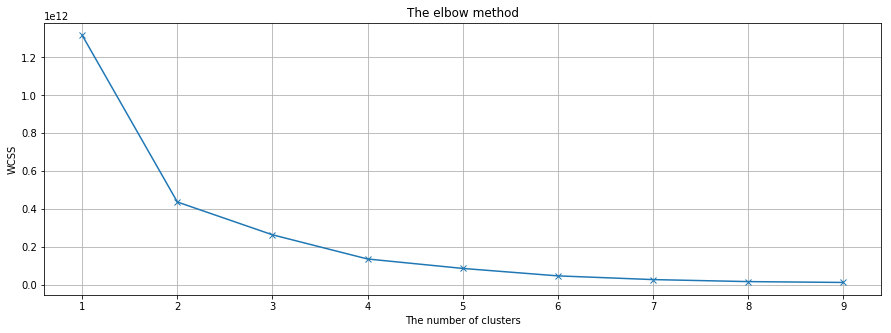

In [26]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), wcss_m, marker = "x")
plt.grid(True)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Based on the above Elbow method, we get 3 as number of optimum clusters

kmeans_m = KMeans(n_clusters=3, random_state=0).fit(m)

In [28]:
km_m = kmeans_m.labels_
km_m

array([1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0,
       2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
      dtype=int32)

**2. Information** The second matrix will have this format: $m_{ij} = tfIdf_{ij}$ where $i \in \{announcement_1, ..., announcement_n\}$ and $j \in \{word_1, ...,word_m\}$. n is the number of the announcements and m is the cardinality of the vocabulary.

In [29]:
# Convert the tfi_index to dataframe

with open('tfidf_index.txt') as f: 
    index = json.load(f)
    
tfi_df = pd.DataFrame() 

for key in index:     
    d = []
    idx = []
    for i in index[key]: 
        d.append(i[1])
        idx.append(i[0])
    s = pd.Series(data = d, index = idx, name = key)
    tfi_df = pd.concat([tfi_df, s], axis=1)

In [30]:
tfi_df

,578,536,357,1042,493,996,163,830,337,483,...,186,1120,320,949,162,301,20,353,809,387
0,0.931558,2.598566,5.375278,8.379309,4.189655,1.99243,4.189655,4.189655,0.515658,1.791759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.931558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.515658,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.931558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257829,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.931558,NaN,1.791759,NaN,NaN,NaN,NaN,NaN,0.257829,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.931558,1.299283,NaN,NaN,NaN,NaN,NaN,NaN,0.773487,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.931558,1.299283,NaN,NaN,NaN,NaN,NaN,NaN,0.515658,1.791759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.931558,NaN,1.791759,NaN,NaN,NaN,NaN,NaN,0.773487,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.931558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.931558,1.299283,NaN,NaN,NaN,NaN,NaN,NaN,0.515658,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1.299283,1.791759,NaN,NaN,NaN,NaN,NaN,0.257829,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# replace NaN with zeros

tfi_df = tfi_df.fillna(value = 0)

In [32]:
# Normalize entire dataframe 

normalized_tfi_df = (tfi_df - tfi_df.min()) / (tfi_df.max() - tfi_df.min())
normalized_tfi_df

,578,536,357,1042,493,996,163,830,337,483,...,186,1120,320,949,162,301,20,353,809,387
0,0.5,0.333333,1.000000,1.0,1.0,1.0,1.0,1.0,0.181818,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.272727,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.5,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.181818,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.5,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.272727,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.5,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.166667,0.333333,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Create second matrix for clustering

mw = normalized_tfi_df.values

In [34]:
mw

array([[0.5       , 0.33333333, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

#### Elbow Method and K-Means Clustering

In [35]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss_mw = [] # Within Cluster Sum of Squares
for k in range(1, 65):
    kmeans_mw = KMeans(n_clusters = k, random_state = 0).fit(mw)
    wcss_mw.append(kmeans_mw.inertia_)

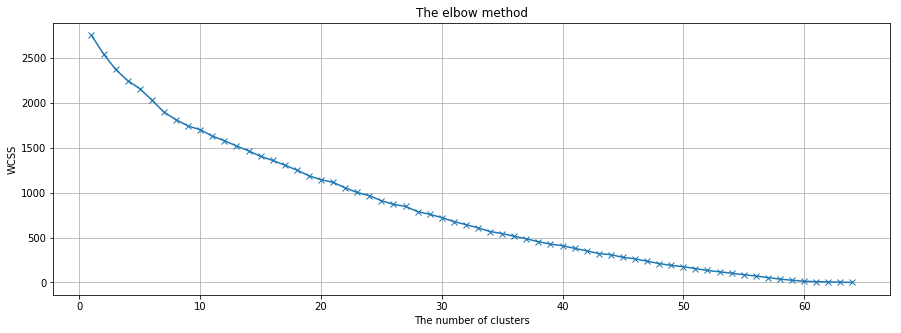

In [36]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 65), wcss_mw, marker = "x")
plt.grid(True)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# Based on the above Elbow method, we get 55 as number of optimum clusters

kmeans_mw = KMeans(n_clusters=55, random_state=0).fit(mw)

In [38]:
km_mw = kmeans_mw.labels_
km_mw

array([35,  5, 47,  5, 52, 32, 53, 28, 23, 27, 14, 20, 36, 31, 12,  9,  9,
        7, 26, 30, 29, 17, 42,  6, 54,  3, 18, 16,  8, 19, 24,  2, 38,  1,
       13, 24,  0, 45,  0, 13,  4, 51, 41, 11, 43, 49, 48,  2,  2, 44, 39,
       46, 48, 50, 11, 11, 11, 40, 37, 15, 34, 10, 22, 21, 25, 33],
      dtype=int32)